In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from decimal import Decimal

In [7]:
df = pd.read_csv('employee_reviews.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(67529, 16)

In [104]:
cols = ['overall-ratings', 'work-balance-stars' , 'culture-values-stars', 
                      'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']
def check(input):
    return input.replace('.','',1).isdigit()

ratings = df[cols].astype(str)
ratingsIndex = ratings[ratings.applymap(check)].dropna(axis = 0).index
df.loc[ratingsIndex, :] #we could drop the rows where a rating is missing

#df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,tokenized_pros,tokenized_summary,tokenized_cons,tokenized_advice
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[peopl, smart, friendli]","[best, compani, work]","[bureaucraci, slow, thing]",[none]
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...",4,1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,[],"[move, speed, light, burn, inevit]","[work, life, balanc, balanc, perk, benefit, il...","[dont, dismiss, emot, intellig, adapt, leaders..."
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,"[your, softwar, engin, your, among, king, hill...","[great, balanc, bigcompani, secur, fun, fastmo...","[becom, larger, come, grow, pain, bureaucraci,...","[keep, focu, user, everyth, els, follow]"
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,"[cant, find, wellregard, compani, actual, dese...","[best, place, ive, work, also, demand]","[live, sf, commut, take, hour, hour, way, shut...","[keep, micromanag, huge, benefit, us, huge, wo..."
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,"[world, everi, compani, lot, peopl, seriou, ga...","[uniqu, one, kind, dream, job]","[dont, work, mtv, hq, given, work, howev, pass...","[promot, manag, manag, manag, skill, train, ma..."
5,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...,"[peopl, busi, nice, help, make, suitabl, inter...","[nice, work, intern]","[food, good, expect, peopl, said, get, wors, r...",[none]
6,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[great, work, environ, good, work, life, balanc]","[softwar, engin]","[usual, big, compani, problem, hierarchi]",[none]
7,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[work, cultur, benefit, growth, peopl]","[great, place, work, progress]","[con, think]",[none]
8,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can

In [36]:
#Need to run this once to fully install nltk
import nltk
#nltk.download()

In [95]:
# Python NLP Tutorial: https://pythonspot.com/tokenizing-words-and-sentences-with-nltk/

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

#df.loc[1, 'pros'] = 4.0

def tokenize(sentence):
    
    
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.translate ({ord(c): " " for c in "/"})
    sentence = re.sub('[^a-z\s]+', '', sentence)
    stopWords = set(stopwords.words('english'))
    
    # We want the company name to be excluded
    stopWords.update(['google','netflix','amazon','microsoft','apple', 'facebook'])
    
    ps = PorterStemmer()
    filtered = []
    
    words = word_tokenize(sentence)
    #print(words)
    for word in words:
        # Only keep word stems - sort of normalization for NLP

        # Remove stop words
        if(len(word) > 1):
            if word not in stopWords:
                word = ps.stem(word) 
                filtered.append(word)


    return filtered
      
df['tokenized_pros'] = df['pros'].apply(tokenize) #tokenize the pros column
df['tokenized_summary'] = df['summary'].apply(tokenize) #tokenize the summary column
df['tokenized_cons'] = df['cons'].apply(tokenize) #tokenize the cons column
df['tokenized_advice'] = df['advice-to-mgmt'].apply(tokenize)
#tokenize(df.loc[1, 'pros'])

In [100]:
df.to_csv('tokenized text data2.csv')

In [44]:
pros = df.loc[:, ['company','tokenized_pros']]
asTuples = list(pros.itertuples(index=False, name=None))
#train, test = train_test_split(asTuples, test_size=0.2, random_state=42)
#classifier = nltk.NaiveBayesClassifier.train(train)
# print(classifier.classify(test['tokenized_pros']))

TypeError: unhashable type: 'list'

TypeError: cannot perform reduce with flexible type

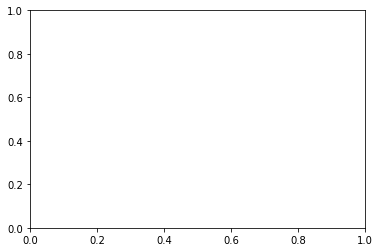

In [105]:
sns.boxplot(df['work-balance-stars'])